# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [4]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt # baseline modul

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [6]:
# defining parameters
m = 1 #cash-on-hand
v = 10 #disutility of labor
eps = 0.3 #elasticity of labor supply
tau_0 = 0.4 #standard labor income tax
tau_1 = 0.1 #top bracket labor income tax
kappa = 0.4 #cut-off for top labor income tax


# Defining utility

def utility(x_0):
    c = x_0[0]
    l = x_0[1]
    u = np.log(c) - v*(l**(1+1/eps)/(1+1/eps))
    return u


# Defining constraint

def constraint(x_0):
    w = x_0[0]
    l = x_0[1]
    x = m + w*l - (tau_0*w*l + tau_1*np.max(w*l-kappa,0))
    return x

# Defining equality 

def eq(x_0):
    w = x_0[0]
    l = x_0[1]
    c = x_0[2]
    c = m + w*l - (tau_0*w*l + tau_1*np.max(w*l-kappa,0))
    return -utility(x_0)

# Optimizing consumption, labor supply and wage rate
x0 = [1,0.25,1]
bounds = ((0.5,1.5),(0,1),(0,1.5))
con1 = {"type":"ineq", "fun":constraint}
con2 = {"type":"eq", "fun":eq}
cons = [con1, con2]

res = optimize.minimize(eq, x0, bounds=bounds,constraints=cons, method='SLSQP')
print(res.message)

# Unpacking results
utility_opt = res.fun
w_star, l_star, c_star = res.x
print(f'optimal wage rate: {w_star:.2f}')
print(f'optimal labour supply: {l_star:.2f}')
print(f'optimal consumption: {c_star:.2f}')
print(f'utility: {utility_opt:.10f}')

Optimization terminated successfully.
optimal wage rate: 1.01
optimal labour supply: 0.25
optimal consumption: 1.00
utility: 0.0000000001


# Question 2

ADD ANSWER.

<function matplotlib.pyplot.show(*args, **kw)>

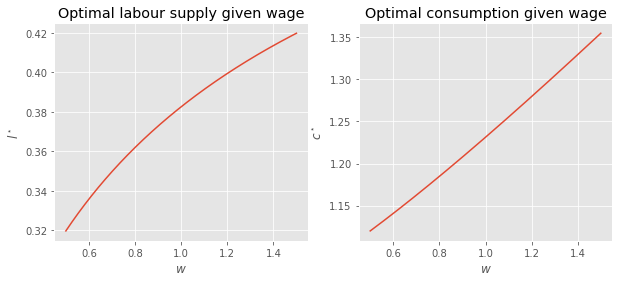

In [6]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

N=10000
w_vec = np.linspace(0.5, 1.5, num=N)
l_opt = np.empty(N)
c_opt = np.empty(N)


for i,w in enumerate(w_vec):
    opt = optimizer(w,eps,v,tau_0,tau_1,kappa,m)
    l_opt[i] = opt[0]
    c_opt[i] = opt[1]
    
fig = plt.figure(figsize=(10,4))

ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_opt)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_opt)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show


# Question 3

ADD ANSWER.

In [23]:
tax_rev = np.sum(tau_0*w_vec*l_opt + tau_1*np.max(w_vec*l_opt-kappa,0))
print(f'The total tax revenue is equal to: {tax_rev:.2f}')


The total tax revenue is equal to: 1775.39


# Question 4

ADD ANSWER.

In [27]:
eps_new = 0.1 
l_opt_new = np.empty(N)
for i,w in enumerate(w_vec):
    opt = optimizer(w,eps_new,v,tau_0,tau_1,kappa,m)
    l_opt_new[i] = opt[0]
    
tax_rev_new = np.sum(tau_0*w_vec*l_opt_new + tau_1*np.max(w_vec*l_opt_new-kappa,0))
print(f'The total tax revenue is equal to: {tax_rev_new:.2f}')


The total tax revenue is equal to: 3578.90


# Question 5

ADD ANSWER.

In [52]:
def taxrev(tau_0,tau_1,w_vec,l,kappa):
    tax = np.sum(tau_0*w_vec*l + tau_1*np.max(w_vec*l-kappa,0))
    return -taxrev(tau_0,tau_1,w_vec,l_opt,kappa)



In [53]:
initial_guess = [1,1,1]

bounds = [(0,1),(0,1),(0,1)]


tax_opt = optimize.minimize(taxrev,initial_guess, bounds=bounds,method='SLSQP', args=(w_vec))

tau_0_opt = tax_opt.x[0]
tau_1_opt = tax_opt.x[1]
kappa_opt = tax_opt.x[2]




TypeError: taxrev() missing 3 required positional arguments: 'w_vec', 'l_opt', and 'kappa'

# Conclusion

ADD CONCISE CONLUSION.

spørgsmål 5 skal optimere tau_0, tau_1, kappa og l for hver observation, i og summere hver persons skattebetaling. 


